In [1]:
import numpy as np
import pandas as pd

In [2]:
x = np.load("data/X.npy")
y = np.load("data/y.npy")

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def my_softmax(z):
    a = tf.nn.softmax(z)
    return a

In [5]:
print ('The first element of x is: ', x[0])

The first element of x is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [6]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [7]:
print ('The shape of x is: ' + str(x.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of x is: (5000, 400)
The shape of y is: (5000, 1)


In [8]:
print(np.unique(x))  # Should print [0 1] if it's in bits

[-0.13196323 -0.11993388 -0.11220256 ...  1.12024444  1.12393404
  1.1276883 ]


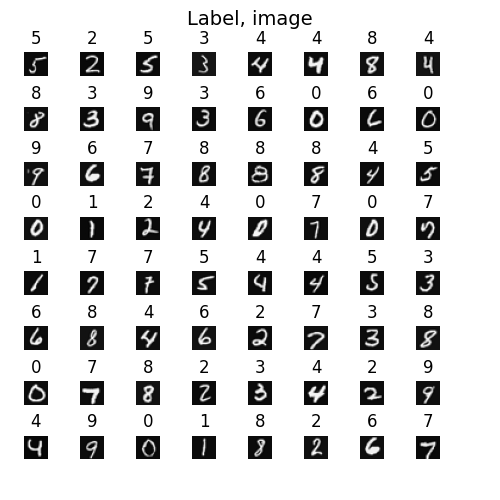

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 0.9, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    x_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(x_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

- import warnings
This imports the warnings module, which is used to manage and control warnings in Python.
- warnings.simplefilter(action='ignore', category=FutureWarning)
This line configures the warning system to ignore all FutureWarning messages. This can be useful if you're working with libraries that may give future warnings (like deprecation warnings), but you don't want them to clutter your output.
- m, n = x.shape
This line gets the shape of the matrix x, which is assumed to be a 2D numpy array (such as a dataset of images where each row is a flattened image).
m will be the number of samples (rows), and n will be the number of features (columns).
For example, if x has 1000 rows and 400 features, m will be 1000, and n will be 400.
- fig, axes = plt.subplots(8,8, figsize=(5,5))
This creates a subplot grid of 8x8 (i.e., 64 subplots) with a total figure size of 5x5 inches. fig refers to the overall figure, and axes is an array of subplots (axes) where each subplot corresponds to an individual image in the grid.
plt.subplots(8, 8) creates a grid with 8 rows and 8 columns of subplots, while figsize=(5, 5) ensures that the whole figure is sized 5 inches by 5 inches.
- fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])
This adjusts the spacing between subplots to avoid overlap.
pad=0.13 controls the padding between subplots, and rect=[0, 0.03, 1, 0.91] specifies the area for the subplots within the figure (as normalized coordinates from 0 to 1, where [0, 0.03, 1, 0.91] keeps a small margin around the edges).
- for i, ax in enumerate(axes.flat):
This starts a loop to iterate through each subplot in the axes grid. axes.flat flattens the 2D grid of subplots into a 1D array, so ax will represent each individual axis in the 8x8 grid, and i will be the index of each subplot.
- random_index = np.random.randint(m)
This generates a random index between 0 and m-1 (inclusive), where m is the number of samples in the dataset x. The idea is to select a random image from x in each iteration of the loop.
- x_random_reshaped = x[random_index].reshape((20, 20)).T
This line reshapes the randomly selected sample x[random_index] from a flattened vector of length n (e.g., 400) into a 2D matrix of shape (20, 20) (assuming each image is 20x20 pixels, which is a common format for small datasets like MNIST).
.T transposes the reshaped image, flipping it around its diagonal, which can be useful depending on how the image was originally flattened.
- ax.imshow(x_random_reshaped, cmap='gray')
This displays the reshaped (and transposed) image on the current axis ax. imshow is used to display images. The cmap='gray' argument ensures that the image is displayed in grayscale.
- ax.set_title(y[random_index, 0])
This sets the title of the subplot (the image) to be the label associated with the randomly selected sample. y[random_index, 0] accesses the label for the selected sample from the array y.
This assumes that y is a 2D array where each row corresponds to a label for the corresponding image in x.
- ax.set_axis_off()
This turns off the axis for the current subplot. This is done to hide the axis ticks, making the display cleaner and focusing solely on the image.
- fig.suptitle("Label, image", fontsize=14)
This sets a title for the entire figure (not individual subplots) with the text "Label, image". The font size for the title is set to 14.
suptitle is used to give the entire figure a title.

In [10]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)

In [11]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [15]:
history = model.fit(
    x,y,
    epochs=70
)

Epoch 1/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0301 
Epoch 2/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7010 
Epoch 3/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4491 
Epoch 4/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3633 
Epoch 5/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3164  
Epoch 6/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2840 
Epoch 7/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2586 
Epoch 8/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2378 
Epoch 9/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2200 
Epoch 10/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2045 
Epoch 11/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1908 
Epoch 12/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1786 
Epoch 13/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1675 
Epoch 14/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1576 
Epoch 15/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 0

In [16]:
random_index = np.random.randint(4000)

In [17]:
def plt_digit(random_index):
    image_reshaped = x[random_index].reshape(20, 20).T
    plt.figure(figsize=(2,2))
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f"Random Image {random_index}")
    plt.show()

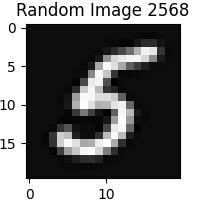

In [18]:
plt_digit(random_index)

In [20]:
prediction = model.predict(x[random_index].reshape(1,400))  # prediction
print(f"Prediction of a random integer: \n{prediction}")
print(f"Largest Prediction index by Nishad 221P045: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction of a random integer: 
[[ -3.0327718 -14.637002  -15.330963   -2.2095273  -9.800249   17.011053
   -7.1131077 -27.368816   -3.0837939  -5.002859 ]]
Largest Prediction index by Nishad 221P045: 5
